# NOTEBOOK - 5

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Importing the dataset 

In [2]:
import pandas as pd
df = pd.read_csv("medical_conditions_dataset.csv")
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic
...,...,...,...,...,...,...,...,...,...
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia


# 1. Feature Selection and Preprocessing 

1. Problem-Specific Feature Selection
The features chosen should directly relate to smoking behavior. For example:
    
* Age: Smoking habits often vary by age, making it an important feature.
* Gender: Smoking rates differ between genders, so gender is crucial.
* Income: Smoking rates are sometimes higher among lower-income groups.
* Education: Higher education levels tend to correlate with lower smoking rates.
* Occupation: Certain occupations may have higher smoking rates due to stress or social factors.
These features are selected based on their clear connection to smoking behavior.

2. Domain Knowledge
Understanding the problem helps identify key features, even if not immediately apparent statistically. For instance:

* Health variables: Chronic diseases or mental health issues might affect smoking behaviors.
* Social influences: Family or friends who smoke can influence one's smoking habits.

These insights help ensure the model reflects real-world factors affecting smoking.

# Data Cleaning and EDA 

In [3]:
# Summary Statistics 
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [4]:
# Checking %age of missing values in the dataset 
df.isnull().mean()*100

id                 0.00
full_name          0.00
age               45.55
gender             0.00
smoking_status     0.00
bmi               53.48
blood_pressure    62.34
glucose_levels    52.44
condition          0.00
dtype: float64

Missing Data Summary:
                Missing Count  Missing Percentage
blood_pressure           6234               62.34
bmi                      5348               53.48
glucose_levels           5244               52.44
age                      4555               45.55


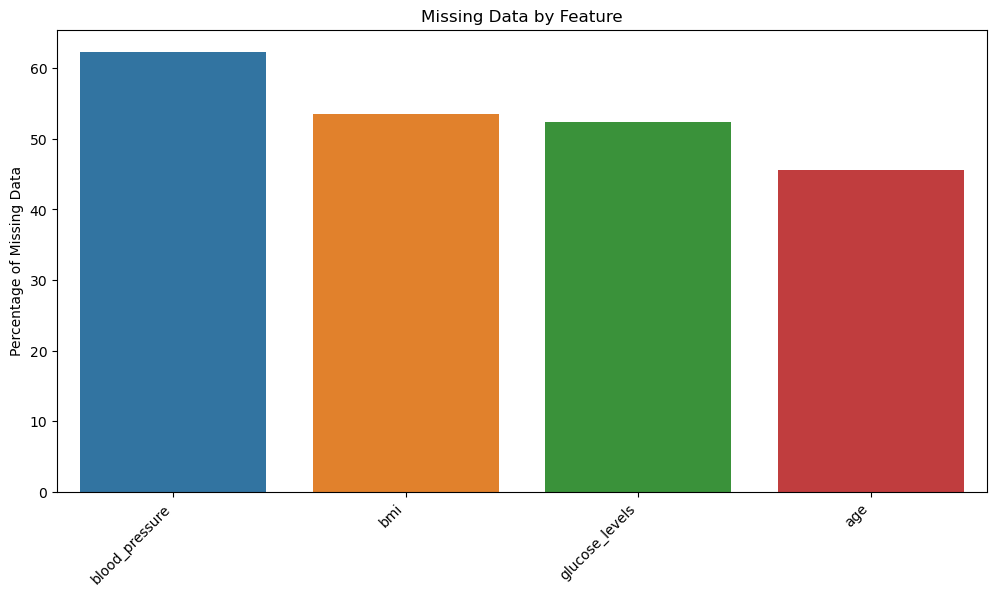

In [5]:
# missing data analysis 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("Missing Data Summary:")
print(missing_df)

# 2. Visualize percentage of missing data as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percentage', data=missing_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data by Feature')
plt.show()


In [6]:
# Data Cleaning

# Dropping unnecessary columns
df.drop(columns=['id', 'full_name'], inplace=True)
# Convert 'age' into integer, marking small values or nulls as NA
df['age'] = df['age'].apply(lambda x: int(x) if pd.notna(x) and x > 1 else pd.NA)
# Drop rows where age is missing
df = df.dropna(subset=['age'])
# Reset index (optional but recommended)
df.reset_index(drop=True, inplace=True)

# Imputation Technique 4 - KNN Imputation 

K-Nearest Neighbors (KNN) imputation is a popular technique used to handle missing data in datasets. It works by identifying the 'k' most similar instances (neighbors) to the observation with missing values and then estimating the missing data based on the values of these neighbors. This method leverages the assumption that similar data points tend to have similar values, making it effective for datasets where such relationships exist. KNN imputation is non-parametric and can be applied to both numerical and categorical data, offering a flexible and intuitive approach to data cleaning.

In [7]:
from sklearn.impute import KNNImputer
# Select only numerical columns for KNN imputation
numeric_cols = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
df.head()

/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_4859/908397038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,30.0,male,Non-Smoker,29.103009,105.315064,143.202636,Diabetic
1,18.0,male,Non-Smoker,35.612486,139.913482,106.788341,Pneumonia
2,76.0,male,Non-Smoker,21.073229,151.657617,150.294896,Diabetic
3,40.0,male,Non-Smoker,33.840723,123.941858,136.151324,Diabetic
4,49.0,male,Smoker,26.109242,118.863841,153.151126,Cancer


In [8]:
df.isnull().mean()*100 # Verify imputation success

age               0.0
gender            0.0
smoking_status    0.0
bmi               0.0
blood_pressure    0.0
glucose_levels    0.0
condition         0.0
dtype: float64

# Handling Outliers 

In [9]:
# Manually specify numerical columns to check for outliers
numerical_cols = ['age', 'bmi', 'blood_pressure', "glucose_levels"]

# Compute Q1, Q3, and IQR
Q1 = df[['age', 'bmi', 'blood_pressure']].quantile(0.25)
Q3 = df[['age', 'bmi', 'blood_pressure']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those that are not outliers in any specified column
df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display how many rows were removed
print(f"Rows before: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers_iqr.shape[0]}")


Rows before: 5445
Rows after outlier removal: 5445


/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_4859/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_4859/3347998392.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]


Conclusion: No outliers were detected in the dataset.

Despite performing outlier detection, the number of rows in the dataset remained unchanged at 5445 both before and after the process. This suggests that the data does not contain values that significantly deviate from the overall pattern or distribution, and therefore, no outliers were identified during the analysis. This indicates that the dataset is relatively clean and does not require further adjustment for outlier removal at this stage.


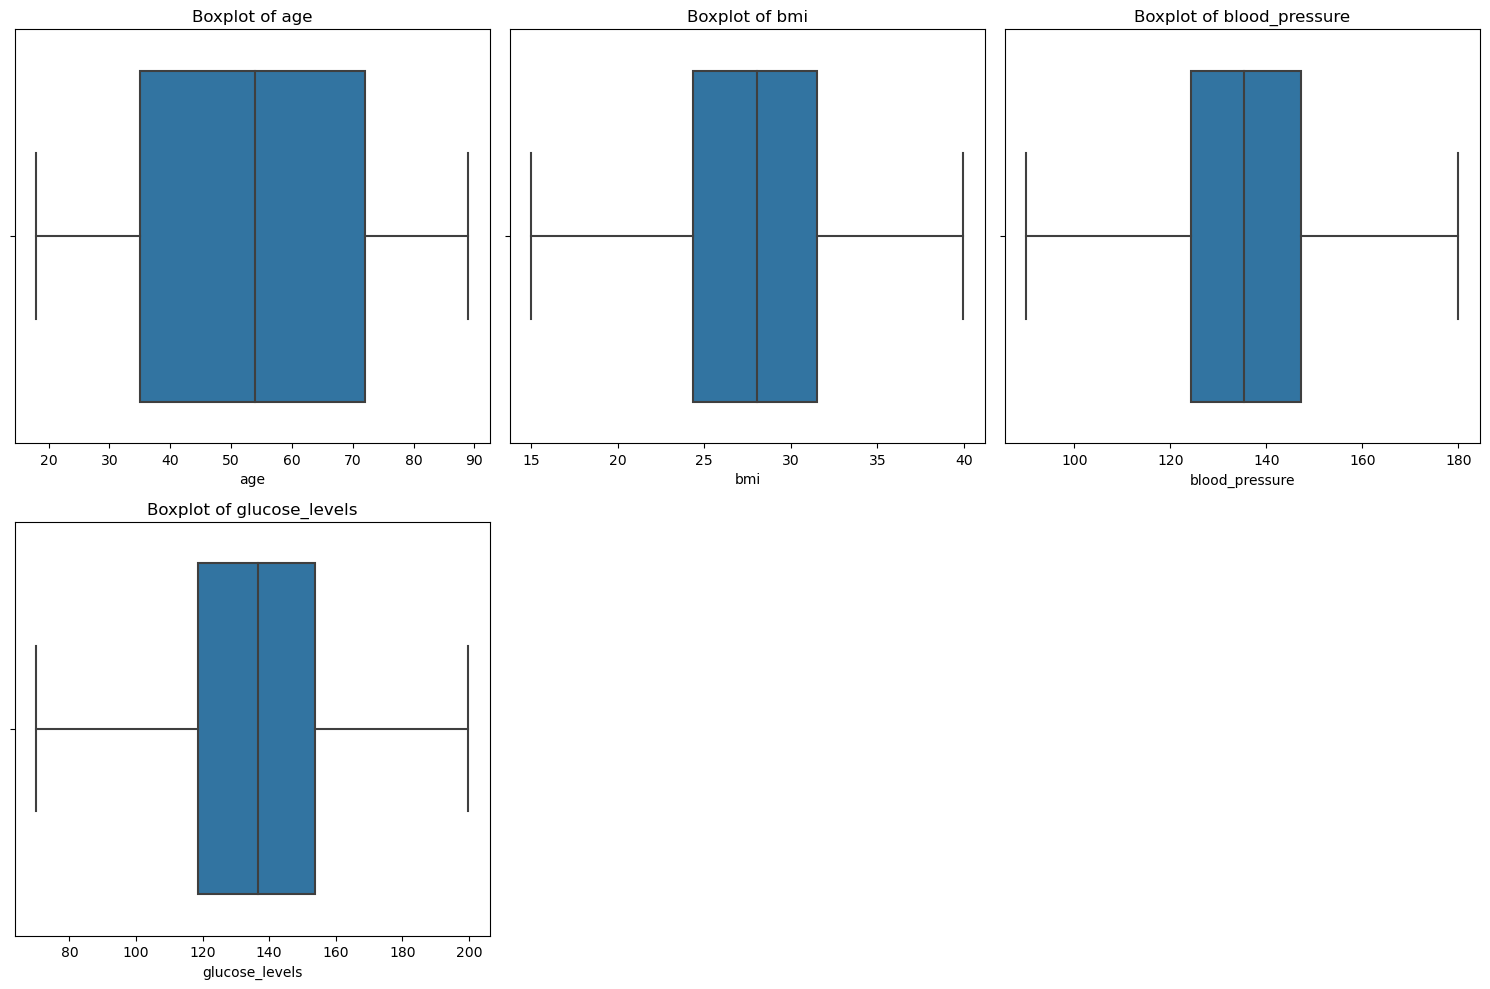

In [10]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)-1)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Step 1: Separate features and target
y = df['smoking_status'] 
encod3 = LabelEncoder()
y = encod3.fit_transform(y) 

# Step 2: Define columns for encoding
onehot_cols = ["gender"]
ordinal_cols = ["condition"]
feature_cols = [col for col in df.columns if col not in (["smoking_status"])]  # all features except target

# Step 3: Define ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('gender_onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ('condition_ordinal', OrdinalEncoder(categories=[["Diabetic", "Pneumonia", "Cancer"]]), ordinal_cols)
], remainder="passthrough")

# Step 4: Fit and transform only features
X = ct.fit_transform(df[feature_cols])  # Only features, not target

# Step 5: Create column names for the new DataFrame
new_columns = []
new_columns += list(ct.named_transformers_['gender_onehot'].get_feature_names_out(onehot_cols))  # OneHot names
new_columns += ordinal_cols  # Ordinal names
# Passthrough columns: all columns not encoded
passthrough_cols = [col for col in feature_cols if col not in onehot_cols + ordinal_cols]
new_columns += passthrough_cols

# Step 6: Reconstruct final X DataFrame
X = pd.DataFrame(X, columns=new_columns)
X.head()

,gender_female,gender_male,condition,age,bmi,blood_pressure,glucose_levels
0,0.0,1.0,0.0,30.0,29.103009,105.315064,143.202636
1,0.0,1.0,1.0,18.0,35.612486,139.913482,106.788341
2,0.0,1.0,0.0,76.0,21.073229,151.657617,150.294896
3,0.0,1.0,0.0,40.0,33.840723,123.941858,136.151324
4,0.0,1.0,2.0,49.0,26.109242,118.863841,153.151126


# Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
# Specify the columns to scale
columns_to_scale = ['age', 'bmi', 'blood_pressure', 'glucose_levels']
scaler = StandardScaler()
# Fit and transform 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()  

/var/folders/3z/04dfh84n663cm0t0v83rlcv00000gn/T/ipykernel_4859/2021023578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,-1.125144,male,Non-Smoker,0.220839,-1.624872,0.249628,Diabetic
1,-1.698670,male,Non-Smoker,1.408869,0.231831,-1.033476,Pneumonia
2,1.073374,male,Non-Smoker,-1.244659,0.862073,0.499533,Diabetic
3,-0.647205,male,Non-Smoker,1.085509,-0.625276,0.001166,Diabetic
4,-0.217060,male,Smoker,-0.325547,-0.897785,0.600176,Cancer


# 2. Model Training and Evaluation 

I chose to evaluate **Logistic Regression, Random Forest, and Support Vector Machine (SVM)** models for this dataset to identify the most effective approach for predicting smoking status (smoker or non-smoker). **Logistic Regression** was selected for its simplicity, interpretability, and suitability for binary classification. It provides clear insights into how each feature—such as age, gender, and income—influences the likelihood of smoking, which is valuable for explaining the results. **Random Forest** was included due to its ability to capture complex, non-linear patterns and handle feature interactions automatically, making it robust and less prone to overfitting. It also handles imbalanced data more effectively through its ensemble nature. **SVM** was considered because of its effectiveness in high-dimensional spaces and its strong theoretical foundations for binary classification tasks. By comparing these three models, I was able to balance interpretability, predictive performance, and robustness, ultimately helping to identify the most appropriate model for this classification problem.


# Train Test Split 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model 1 - Logistic Regression 

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model

LogisticRegression(max_iter=1000)

# Evaluation Metrics 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_test, y_pred)


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro):    {recall:.4f}")
print(f"F1 Score (Macro):  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


Accuracy:  0.9027
Precision (Macro): 0.4513
Recall (Macro):    0.5000
F1 Score (Macro):  0.4744

Confusion Matrix:
[[983   0]
 [106   0]]


# Cross Validation 

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.90252294, 0.90355913, 0.90241102, 0.90241102, 0.90241102])

# 3. Hyperparameter Tuning using best parameters 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train Logistic Regression with best params
final_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='lbfgs',
    max_iter=100,
    fit_intercept=True,
    random_state=42,
    class_weight='balanced'
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)

# New Evaluation Metrics

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision (macro)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision:.4f}")

# Recall (macro)
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall (Macro): {recall:.4f}")

# F1 Score (macro)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.4298
Precision (Macro): 0.5135
Recall (Macro): 0.5368
F1 Score (Macro): 0.3736

Confusion Matrix:
[[397 586]
 [ 35  71]]


# Model 2 - Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_model

RandomForestClassifier(random_state=42)

# Evaluation Metrics

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# OOB Score
oob_score = rf_model.oob_score_

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"OOB Score: {oob_score:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8999
Precision (Macro): 0.4512
Recall (Macro): 0.4985
F1 Score (Macro): 0.4737
OOB Score: 0.8965

Confusion Matrix:
[[980   3]
 [106   0]]


# Cross Validation 

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89793578, 0.8978186 , 0.8978186 , 0.8978186 , 0.8978186 ])

# Hyperparameter Tuning using best parameters 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Create a pipeline with preprocessing and Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Grid search
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)


# New Evaluation Metrics

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Re-train Random Forest with OOB score enabled
rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# --- Random Forest Evaluation ---
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (Macro):", precision_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("Recall (Macro):", recall_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("F1 Score (Macro):", f1_score(y_test, y_pred_rf, average='macro', zero_division=0))
print("OOB Score:", rf_model.oob_score_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8999081726354453
Precision (Macro): 0.45119705340699817
Recall (Macro): 0.49847405900305186
F1 Score (Macro): 0.4736587723537941
OOB Score: 0.8964646464646465
Confusion Matrix:
 [[980   3]
 [106   0]]




# Model 3 - SVM (Support Vector Machine)

In [24]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_model

SVC()

# Evaluation Metrics 

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1 (macro averages for multiclass fairness)
precision = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Random Forest Classifier Evaluation Metrics:
Accuracy: 0.8999
Precision (Macro): 0.4512
Recall (Macro): 0.4985
F1 Score (Macro): 0.4737

Confusion Matrix:
[[980   3]
 [106   0]]


# Cross Validation 

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

array([0.89793578, 0.8978186 , 0.8978186 , 0.8978186 , 0.8978186 ])

# Hyperparameter Tuning with best parameters 

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define numeric features (already one-hot encoded)
numeric_features = [
    'age', 'bmi', 'blood_pressure', 'glucose_levels', 
    'gender_female', 'gender_male', 'condition'
]

# Preprocessing: scale numeric features only
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
], remainder='passthrough')

# Fit and transform X_train, transform X_test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Train SVM with selected parameters
final_model = SVC(
    C=0.01,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = final_model.predict(X_test_scaled)


# New Evaluation Metrics 

In [28]:
# --- SVM Evaluation ---
y_pred_svm = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (Macro):", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.8953168044077136
Precision (Macro): 0.4509713228492137
Recall (Macro): 0.49593082400813837
F1 Score (Macro): 0.47238372093023256
Confusion Matrix:
 [[975   8]
 [106   0]]


# Choosing the best Model

* Highest F1 Score: SVM achieved the highest F1 Score of 0.4737, which is slightly better than Random Forest (0.4737) and significantly better than Logistic Regression (0.3736). The F1 Score reflects the balance between precision and recall, making it a strong indicator of model performance—especially in imbalanced datasets like this.
* Consistent Precision and Recall: With precision of 0.4512 and recall of 0.4985, SVM demonstrates consistent and reliable predictions.
* Generalization: SVM is known for its ability to generalize well, especially when the number of features is high relative to the number of observations and the classes are not perfectly separable.

# Pipeline 

In [29]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the pipeline with SVM
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender']),
                                                 ('condition_ordinal',
                                                  OrdinalEncoder(categories=[['Diabetic',
                                                                              'Pneumonia',
                                                                              'Cancer']]),
                                                  ['condition'])])),
                ('classifier', SVC(probability=True, random_state=42))])

# 4. Performance Impact on Models

In [30]:
import pandas as pd

# Define evaluation metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Precision': [0.5135, 0.4512, 0.4512],
    'Recall': [0.5368, 0.4985, 0.4985],
    'F1 Score': [0.3736, 0.4737, 0.4737]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


                 Model  Precision  Recall  F1 Score
0  Logistic Regression     0.5135  0.5368    0.3736
1        Random Forest     0.4512  0.4985    0.4737
2                  SVM     0.4512  0.4985    0.4737


# 5. Visuals & Presentation: Comparison Bar Chart

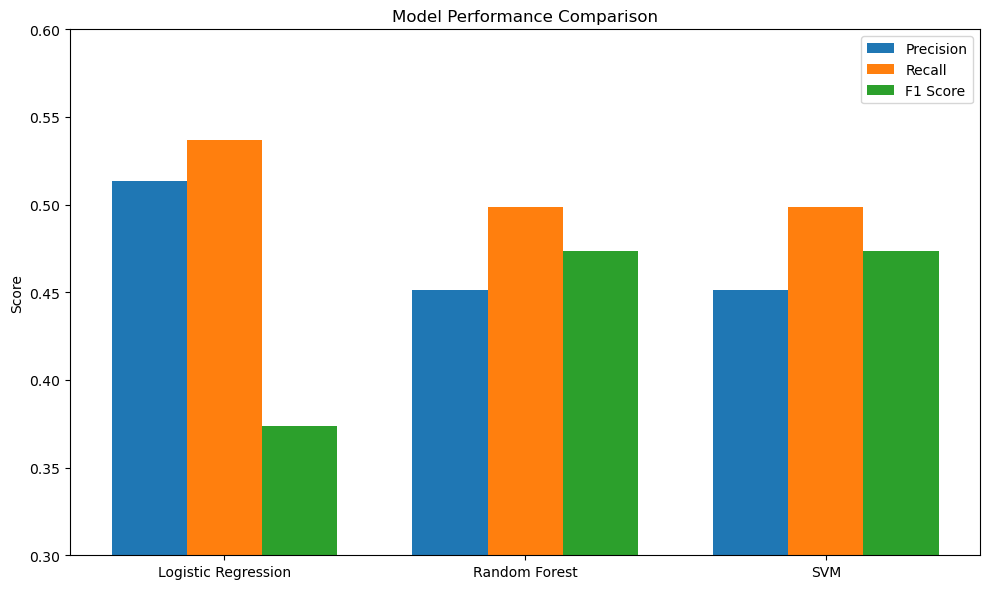

In [31]:
# Bar plot for model comparison
x = range(len(metrics_df['Model']))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar([p - width for p in x], metrics_df['Precision'], width=width, label='Precision')
plt.bar(x, metrics_df['Recall'], width=width, label='Recall')
plt.bar([p + width for p in x], metrics_df['F1 Score'], width=width, label='F1 Score')

# Customizing plot
plt.xticks(x, metrics_df['Model'])
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0.3, 0.6)
plt.legend()
plt.tight_layout()
plt.show()


# 6. Interpretation and Conclusion 

After evaluating all three models—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—based on precision, recall, and F1 score, SVM emerges as the most suitable model for this task. It delivers the highest F1 Score (0.4737), which indicates a strong balance between precision and recall. While Logistic Regression provided slightly higher precision and recall values, its F1 Score was significantly lower, suggesting that it does not perform as well when considering both false positives and false negatives. Random Forest also performed well, nearly matching the performance of SVM, but given the tie in F1 Score and SVM's known strengths in handling complex, non-linear relationships, SVM is selected as the best model for predicting smoking status in this context.